In [ ]:
# Priyal
# Dataset -pc1
# Model -Oversampling
# Train for balancing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualization**

In [ ]:
import pandas as pd

# Load pc1 dataset
pc1_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/pc1.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(pc1_data.head())


First few rows of the dataset:
     loc   v(g)  ev(g)  iv(G)       N         V     L      D       I  \
0    1.1    1.4    1.4    1.4     1.3      1.30  1.30   1.30    1.30   
1    1.0    1.0    1.0    1.0     1.0      1.00  1.00   1.00    1.00   
2   91.0    9.0    3.0    2.0   318.0   2089.21  0.04  27.68   75.47   
3  109.0   21.0    5.0   18.0   381.0   2547.56  0.04  28.37   89.79   
4  505.0  106.0   41.0   82.0  2339.0  20696.93  0.01  75.93  272.58   

            E  ...  lOCode  lOComment  locCodeAndComment  lOBlank  uniq_Op  \
0        1.30  ...       2          2                  2        2      1.2   
1        1.00  ...       1          1                  1        1      1.0   
2    57833.24  ...      80         44                 11       31     29.0   
3    72282.68  ...      97         41                 12       24     28.0   
4  1571506.88  ...     457         71                 48       49     64.0   

   uniq_Opnd  total_Op  total_Opnd  branchCount  defects  
0       

In [ ]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(pc1_data.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                1109 non-null   float64
 1   v(g)               1109 non-null   float64
 2   ev(g)              1109 non-null   float64
 3   iv(G)              1109 non-null   float64
 4   N                  1109 non-null   float64
 5   V                  1109 non-null   float64
 6   L                  1109 non-null   float64
 7   D                  1109 non-null   float64
 8   I                  1109 non-null   float64
 9   E                  1109 non-null   float64
 10  B                  1109 non-null   float64
 11  T                  1109 non-null   float64
 12  lOCode             1109 non-null   int64  
 13  lOComment          1109 non-null   int64  
 14  locCodeAndComment  1109 non-null   int64  
 15  lOBlank            1109 non-null   int64

In [ ]:
# Summary statistics of numerical attributes
print("\nSummary statistics of numerical attributes:")
print(pc1_data.describe())



Summary statistics of numerical attributes:
               loc         v(g)        ev(g)        iv(G)            N  \
count  1109.000000  1109.000000  1109.000000  1109.000000  1109.000000   
mean     23.376105     5.510730     2.766817     3.321371   117.393417   
std      35.284017     8.958976     5.567704     6.401998   197.336888   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       7.000000     1.000000     1.000000     1.000000    25.000000   
50%      13.000000     3.000000     1.000000     2.000000    58.000000   
75%      26.000000     6.000000     3.000000     3.000000   126.000000   
max     602.000000   136.000000   123.000000   123.000000  2785.000000   

                  V            L            D            I             E  ...  \
count   1109.000000  1109.000000  1109.000000  1109.000000  1.109000e+03  ...   
mean     699.711217     0.129414    15.396267    32.904472  2.882288e+04  ...   
std     1509.545684     0.146952    16.337508

In [ ]:
# Class distribution
print("\nClass distribution:")
print(pc1_data['defects'].value_counts())



Class distribution:
False    1032
True       77
Name: defects, dtype: int64


In [ ]:
# Missing values
print("\nMissing values:")
print(pc1_data.isnull().sum())


Missing values:
loc                  0
v(g)                 0
ev(g)                0
iv(G)                0
N                    0
V                    0
L                    0
D                    0
I                    0
E                    0
B                    0
T                    0
lOCode               0
lOComment            0
locCodeAndComment    0
lOBlank              0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


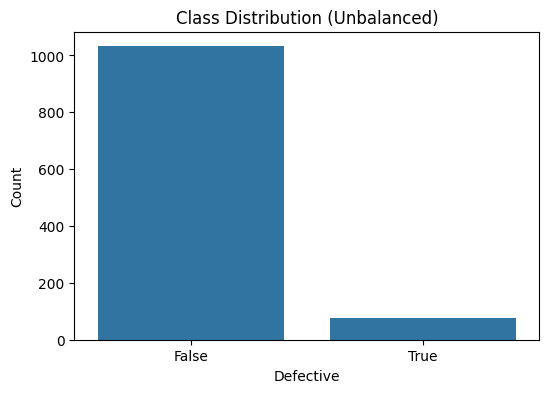

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=pc1_data, x='defects')
plt.title('Class Distribution (Unbalanced)')
plt.xlabel('Defective')
plt.ylabel('Count')
plt.show()




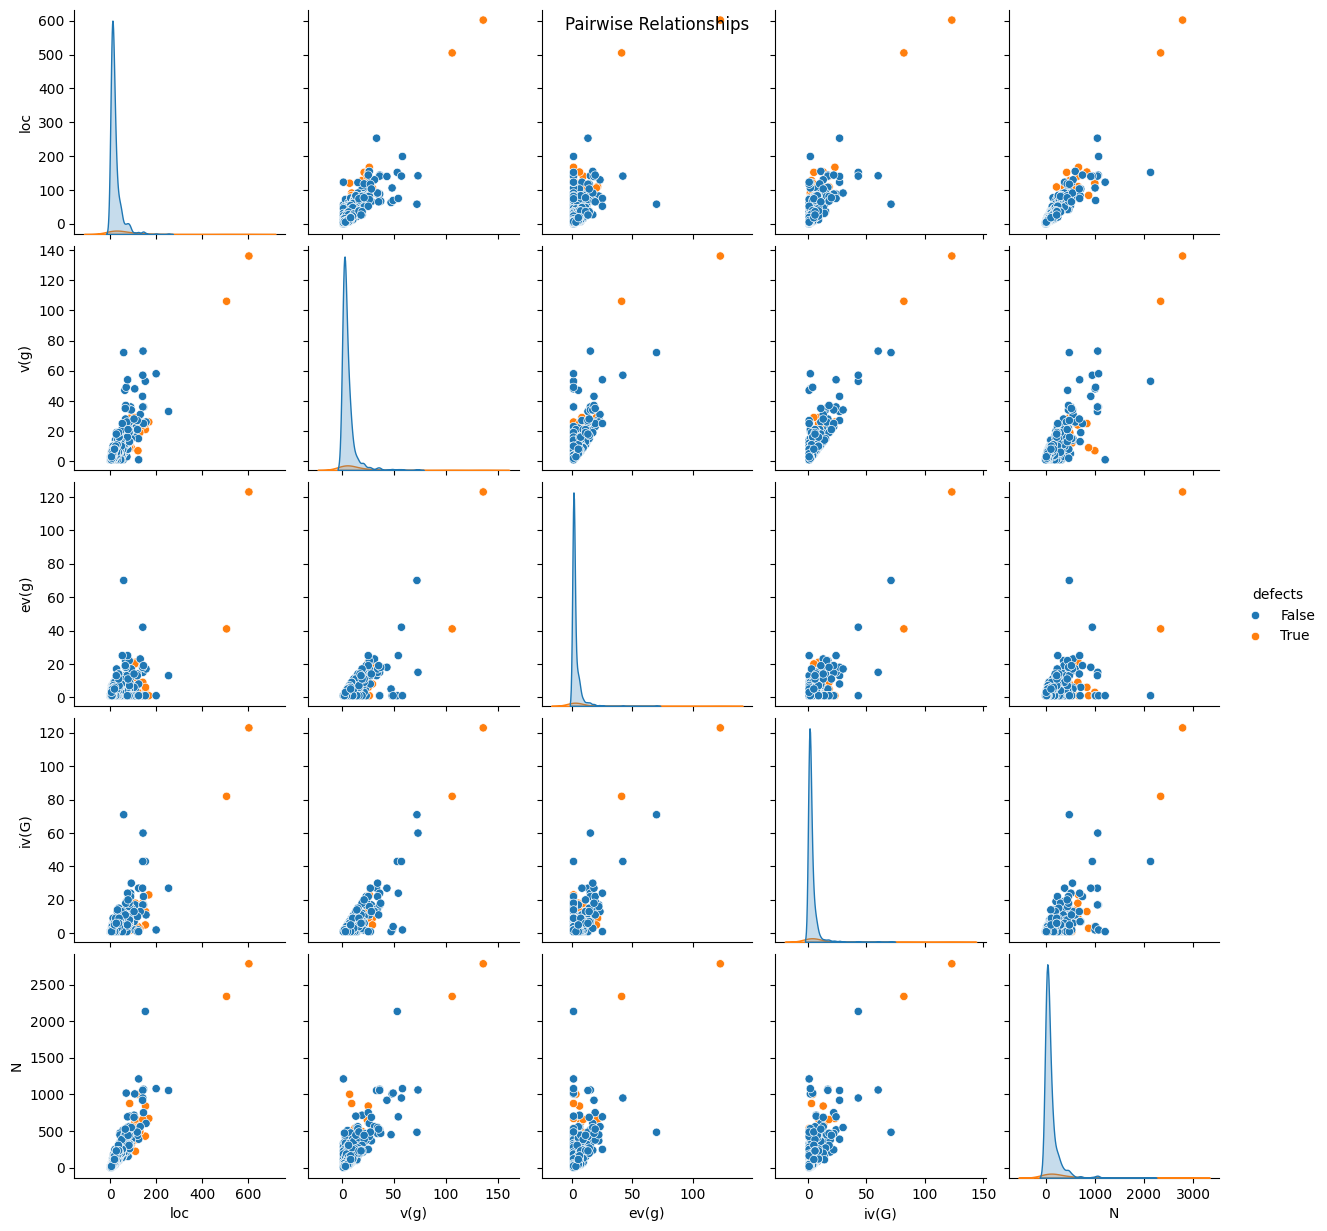

In [ ]:
# Pairwise Relationships
sns.pairplot(pc1_data[['loc', 'v(g)', 'ev(g)', 'iv(G)','N', 'defects']], hue='defects')
plt.suptitle('Pairwise Relationships')
plt.show()



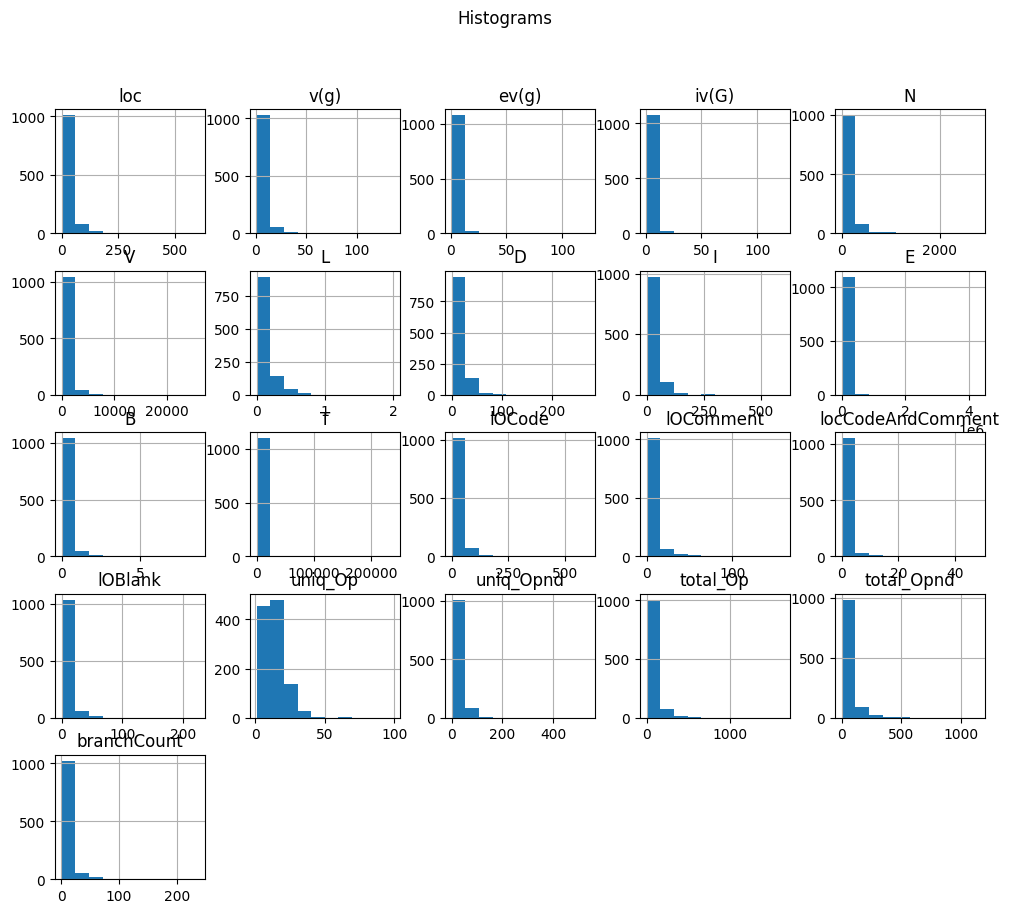

In [ ]:
# Histograms
pc1_data.hist(figsize=(12, 10))
plt.suptitle('Histograms')
plt.show()


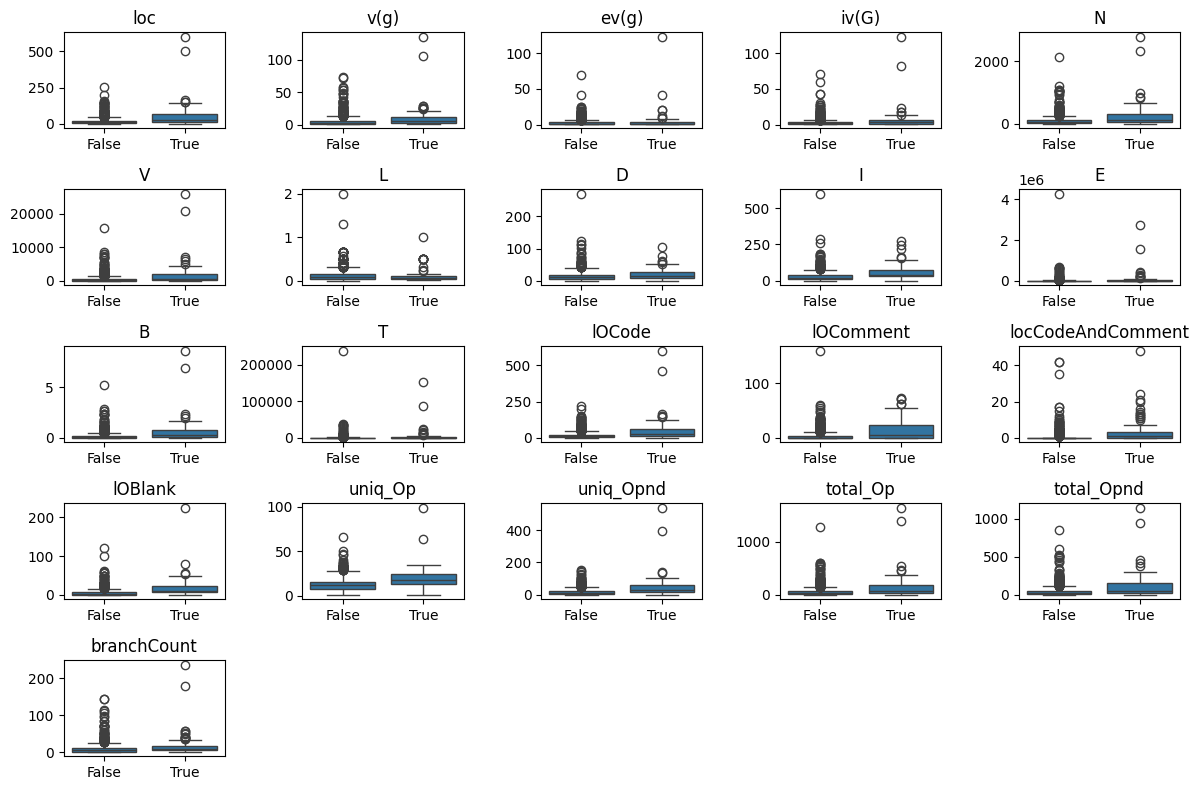

In [25]:
# Visualize box plots for all attributes
plt.figure(figsize=(12, 8))
for i, column in enumerate(pc1_data.columns[:-1]):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='defects', y=column, data=pc1_data)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# **Data Balancing**

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Preprocess data
X = pc1_data.drop(columns=["defects"])
y = pc1_data["defects"]

# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with balanced data
balanced_pc1_ros = pd.DataFrame(X_resampled, columns=X.columns)
balanced_pc1_ros['defects'] = y_resampled

# Save balanced dataset to a new CSV file
balanced_pc1_ros.to_csv("balanced_pc1.csv", index=False)


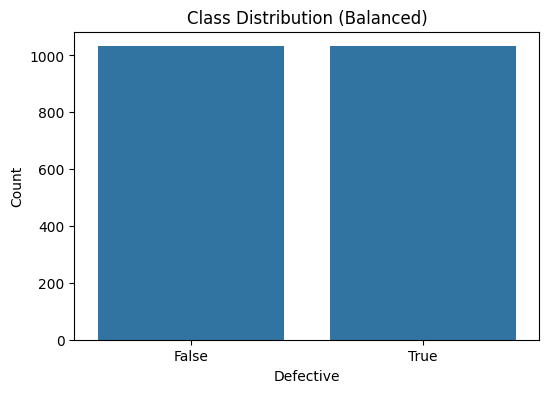

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new balanced dataset
balanced_pc1_data = pd.read_csv("balanced_pc1.csv")

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=balanced_pc1_data, x='defects')
plt.title('Class Distribution (Balanced)')
plt.xlabel('Defective')
plt.ylabel('Count')
plt.show()


# **Random Forest Classifier**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

# Load the balanced dataset generated using ros
balanced_pc1_ros = pd.read_csv("balanced_pc1.csv")

# Split the data into features and target variable
X_ros = balanced_pc1_ros.drop(columns=["defects"])
y_ros = balanced_pc1_ros["defects"]

# Split the data into training and testing sets
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

# Train RandomForestClassifier on the balanced dataset generated using ros
rf_classifier_ros = RandomForestClassifier(random_state=42)
rf_classifier_ros.fit(X_train_ros, y_train_ros)

# Predict on the test set
y_pred_ros = rf_classifier_ros.predict(X_test_ros)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_ros, y_pred_ros)
print("Random Forest Accuracy using ros:", accuracy_rf)

# Calculate precision
precision_rf = precision_score(y_test_ros, y_pred_ros)
print("Random Forest Precision using ros:", precision_rf)

# Calculate recall
recall_rf = recall_score(y_test_ros, y_pred_ros)
print("Random Forest Recall using ros:", recall_rf)

# Generate classification report
report_ros = classification_report(y_test_ros, y_pred_ros)

# Print classification report
print("Classification Report for Random Forest using ros:")
print(report_ros)


Random Forest Accuracy using ros: 0.9927360774818402
Random Forest Precision using ros: 0.9855769230769231
Random Forest Recall using ros: 1.0
Classification Report for Random Forest using ros:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       208
        True       0.99      1.00      0.99       205

    accuracy                           0.99       413
   macro avg       0.99      0.99      0.99       413
weighted avg       0.99      0.99      0.99       413



# **K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Accuracy using ros balanced file: 0.5116279069767442
K-means Precision : 0.9615384615384616
K-means Recall : 0.5116279069767442


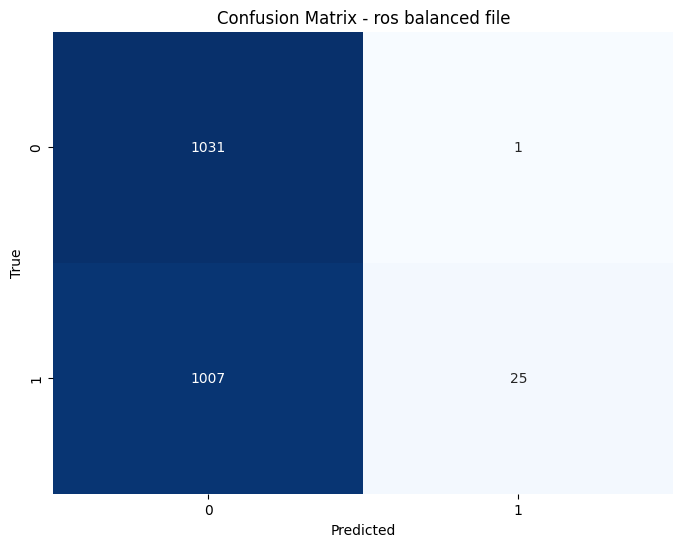

Classification Report:
              precision    recall  f1-score   support

       False       0.51      1.00      0.67      1032
        True       0.96      0.02      0.05      1032

    accuracy                           0.51      2064
   macro avg       0.73      0.51      0.36      2064
weighted avg       0.73      0.51      0.36      2064



In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load ros balanced dataset
balanced_pc1_ros = pd.read_csv("balanced_pc1.csv")

# Separate features and target variable
X_ros = balanced_pc1_ros.drop(columns=["defects"])
y_ros = balanced_pc1_ros["defects"]

# Train KMeans model
kmeans_ros = KMeans(n_clusters=2, random_state=42)
kmeans_ros.fit(X_ros)

# Predict clusters
y_pred_ros = kmeans_ros.labels_

# Calculate accuracy
accuracy_kmeans = accuracy_score(y_ros, y_pred_ros)
print("K-means Accuracy using ros balanced file:", accuracy_kmeans)

# Calculate precision and recall
precision_kmeans = precision_score(y_ros, y_pred_ros)
recall_kmeans = recall_score(y_ros, y_pred_ros,average='weighted')

# Print precision and recall for each class
print("K-means Precision :", precision_kmeans)
print("K-means Recall :", recall_kmeans)

# Create confusion matrix
cm_ros = confusion_matrix(y_ros, y_pred_ros)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ros, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - ros balanced file")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_ros, y_pred_ros))


# **SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the ros balanced dataset
balanced_pc1_ros = pd.read_csv("balanced_pc1.csv")

# Split the data into features and target variable
X_ros = balanced_pc1_ros.drop(columns=["defects"])
y_ros = balanced_pc1_ros["defects"]

# Split the data into training and testing sets
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

# Train SVM on the ros balanced dataset
svm_ros = SVC(kernel='linear')
svm_ros.fit(X_train_ros, y_train_ros)

# Predict on the test set
y_pred_ros = svm_ros.predict(X_test_ros)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test_ros, y_pred_ros)
print("SVM Accuracy using ros:", accuracy_svm)

# Calculate precision
precision_svm = precision_score(y_test_ros, y_pred_ros)
print("SVM Precision using ros:", precision_svm)

# Calculate recall
recall_svm = recall_score(y_test_ros, y_pred_ros)
print("SVM Recall using ros:", recall_svm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_ros, y_pred_ros))


SVM Accuracy using ros: 0.6900726392251816
SVM Precision using ros: 0.6790697674418604
SVM Recall using ros: 0.7121951219512195
Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.67      0.68       208
        True       0.68      0.71      0.70       205

    accuracy                           0.69       413
   macro avg       0.69      0.69      0.69       413
weighted avg       0.69      0.69      0.69       413



# **Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the ros balanced dataset
balanced_pc1_ros = pd.read_csv("balanced_pc1.csv")

# Split the data into features and target variable
X_ros = balanced_pc1_ros.drop(columns=["defects"])
y_ros = balanced_pc1_ros["defects"]

# Split the data into training and testing sets
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

# Train Logistic Regression on the ros balanced dataset
lr_ros = LogisticRegression(random_state=42)
lr_ros.fit(X_train_ros, y_train_ros)

# Predict on the test set
y_pred_ros = lr_ros.predict(X_test_ros)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test_ros, y_pred_ros)
print("Logistic Regression Accuracy using ros:", accuracy_lr)

# Calculate precision
precision_lr = precision_score(y_test_ros, y_pred_ros)
print("Logistic Regression Precision using ros:", precision_lr)

# Calculate recall
recall_lr = recall_score(y_test_ros, y_pred_ros)
print("Logistic Regression Recall using ros:", recall_lr)

# Generate classification report
classification_report_ros = classification_report(y_test_ros, y_pred_ros)
print("Classification Report using ros:")
print(classification_report_ros)


Logistic Regression Accuracy using ros: 0.6755447941888619
Logistic Regression Precision using ros: 0.7232704402515723
Logistic Regression Recall using ros: 0.5609756097560976
Classification Report using ros:
              precision    recall  f1-score   support

       False       0.65      0.79      0.71       208
        True       0.72      0.56      0.63       205

    accuracy                           0.68       413
   macro avg       0.68      0.67      0.67       413
weighted avg       0.68      0.68      0.67       413



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Decision Trees**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the ros balanced dataset
balanced_pc1_ros = pd.read_csv("balanced_pc1.csv")

# Split the data into features and target variable
X_ros = balanced_pc1_ros.drop(columns=["defects"])
y_ros = balanced_pc1_ros["defects"]

# Split the data into training and testing sets
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

# Train Decision Tree on the ros balanced dataset
dt_ros = DecisionTreeClassifier(random_state=42)
dt_ros.fit(X_train_ros, y_train_ros)

# Predict on the test set
y_pred_ros = dt_ros.predict(X_test_ros)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test_ros, y_pred_ros)
print("Decision Trees Accuracy using ros:", accuracy_dt)

# Calculate precision
precision_dt = precision_score(y_test_ros, y_pred_ros)
print("Decision Trees Precision using ros:", precision_dt)

# Calculate recall
recall_dt = recall_score(y_test_ros, y_pred_ros)
print("Decision Trees Recall using ros:", recall_dt)

# Generate classification report
report_ros = classification_report(y_test_ros, y_pred_ros)
print("Classification Report using ros:\n", report_ros)


Decision Trees Accuracy using ros: 0.9733656174334141
Decision Trees Precision using ros: 0.9490740740740741
Decision Trees Recall using ros: 1.0
Classification Report using ros:
               precision    recall  f1-score   support

       False       1.00      0.95      0.97       208
        True       0.95      1.00      0.97       205

    accuracy                           0.97       413
   macro avg       0.97      0.97      0.97       413
weighted avg       0.97      0.97      0.97       413



# **Gradient Boosting**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the ros balanced dataset
balanced_pc1_ros = pd.read_csv("balanced_pc1.csv")

# Split the data into features and target variable
X_ros = balanced_pc1_ros.drop(columns=["defects"])
y_ros = balanced_pc1_ros["defects"]

# Split the data into training and testing sets
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

# Train Gradient Boosting on the ros balanced dataset
gb_ros = GradientBoostingClassifier(random_state=42)
gb_ros.fit(X_train_ros, y_train_ros)

# Predict on the test set
y_pred_ros = gb_ros.predict(X_test_ros)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test_ros, y_pred_ros)
print("Gradient Boosting Accuracy using ros:", accuracy_gb)

# Calculate precision and recall
precision_gb = precision_score(y_test_ros, y_pred_ros)
recall_gb = recall_score(y_test_ros, y_pred_ros)

print("Precision using ros:", precision_gb)
print("Recall using ros:", recall_gb)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_ros, y_pred_ros))


Gradient Boosting Accuracy using ros: 0.9564164648910412
Precision using ros: 0.9192825112107623
Recall using ros: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.91      0.95       208
        True       0.92      1.00      0.96       205

    accuracy                           0.96       413
   macro avg       0.96      0.96      0.96       413
weighted avg       0.96      0.96      0.96       413



# **Comparison Between models**

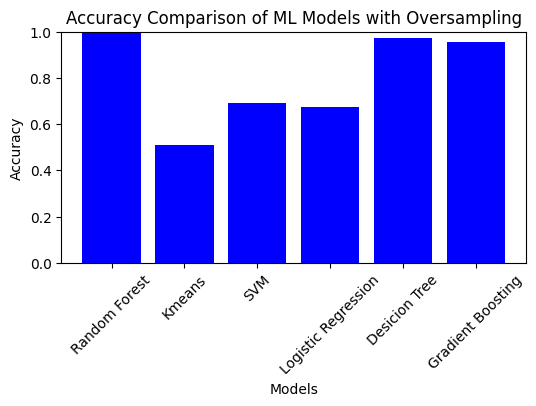

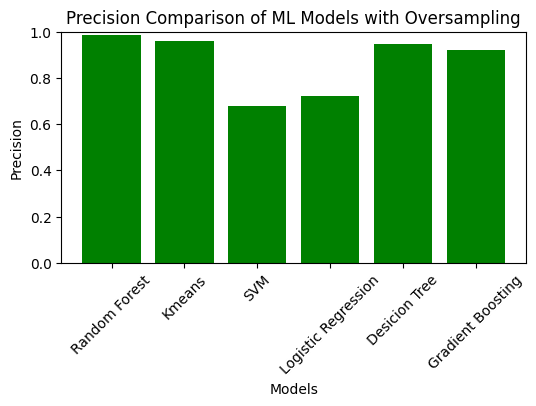

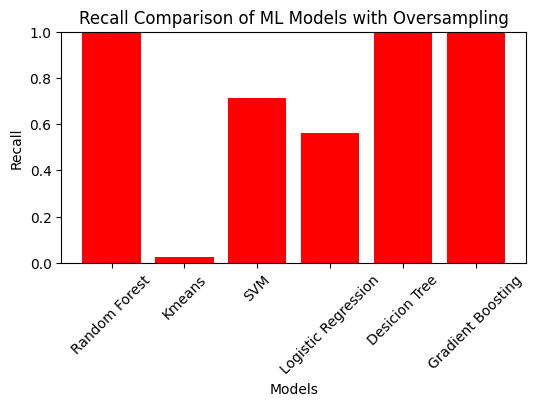

In [ ]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', "Kmeans", 'SVM', 'Logistic Regression', 'Desicion Tree', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_kmeans, accuracy_svm, accuracy_lr, accuracy_dt, accuracy_gb]
precisions = [precision_rf, precision_kmeans, precision_svm, precision_lr, precision_dt, precision_gb]
recalls = [recall_rf, recall_kmeans, recall_svm, recall_lr, recall_dt, recall_gb]

# Plotting accuracy
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy Comparison of ML Models with Oversampling')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting precision
plt.figure(figsize=(6, 3))
plt.bar(models, precisions, color='green')
plt.title('Precision Comparison of ML Models with Oversampling')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting recall
plt.figure(figsize=(6, 3))
plt.bar(models, recalls, color='red')
plt.title('Recall Comparison of ML Models with Oversampling')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()